# Task 2

<b>Name:</b> Abhishek Paul

<h2 style="color:green">Part 1</h2>

### Importing all the necessary libraries.

<b>numpy</b> - to work with arrays.<br/>
<b>cv2</b> - to work with images.<br/>
<b>os</b> - to work with directories and for importing images.<br/>
<b>random</b> - to randomly shuffle the sets.<br/>
<b>pyplot</b> - library: <i>matplotlib</i> - to visualize the images.<br/>
<b>tensorflow</b> - to make the model.

In [1]:
import numpy as np
import cv2 as cv
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

Storing the path of the folder containing the training set images as a raw string in a variable 'dir'.<br/>We are storing it as a raw string because we <b>don't</b> want treat the <b>'\\'</b> characters as escape characters.

In [2]:
dir = r'C:\Users\acer\Desktop\MIDAS_TASK_2\train';

Storing the names of the first ten folders containing - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

In [3]:
class_list = []
for i in range(0, 62):
    class_list.append(i)

In [4]:
print(class_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


### Importing the images.

Importing the images and resizing the images to a shape of 64x64 pixels.

In [5]:
data = list()

for c in class_list:
    folder = os.path.join(dir, str(c))
    label = c
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv.imread(img_path, 0)
        img_arr = cv.resize(img_arr, (64, 64))
        data.append([img_arr, label]) 

Randomly shuffling the data.

In [6]:
random.shuffle(data)

Differently storing the image array and the categories(classes).

In [7]:
train_x = list()
train_y = list()

for img, label in data:
    train_x.append(img)
    train_y.append(label)

Converting the image list and the label list into numpy array for furthern operations.

In [8]:
train_x = np.array(train_x)
train_y = np.array(train_y)

#### One-hot encoding the classes as we will be using categorical cross-entropy as the loss function in our model.

In [9]:
train_y = tf.keras.utils.to_categorical(train_y, 62)

In [10]:
train_x.shape

(2480, 64, 64)

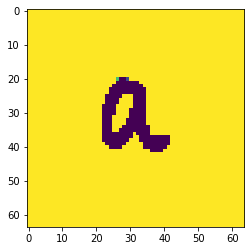

In [11]:
plt.imshow(train_x[0])

In [12]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Expanding the shape of the image array so as to fit in the input of the model.

In [13]:
train_x = np.expand_dims(train_x, axis=3)

# Building the convolutional nueral network(CNN)

I have built a fairly simple model because the dataset contains of numbers and alphabets instead of real world images and hence there will be less features.

### Initializing the model.

In [14]:
cnn = tf.keras.models.Sequential()

### Adding the convolutional layers to extract the features.

#### Adding the first convolutional layer having 32 filters, a 3x3 kernel size and using the rectified linear unit(ReLU) activation function.

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 1]))

#### Adding the first convolutional layer having 64 filters, a 3x3 kernel size and using the rectified linear unit(ReLU) activation function.

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

#### Adding the first convolutional layer having 128 filters, a 3x3 kernel size and using the rectified linear unit(ReLU) activation function.

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))

### Adding the MaxPooling layer to downsample the convoluted arrays.

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1))

### Adding a dropout layer to prevent overfitting.

In [19]:
cnn.add(tf.keras.layers.Dropout(0.2))

### Adding a flattening layer.

Adding the flattening layer to flatten the arrays before feeding it into the neurons.

In [20]:
cnn.add(tf.keras.layers.Flatten())

### Adding the dense neural network having 128 neurons and using the Rectified Linear Unit(ReLU) activation function.

In [21]:
cnn.add(tf.keras.layers.Dense(128, activation='relu'))

### Adding the final output layer using the softmax function for categorical classification.

In [22]:
cnn.add(tf.keras.layers.Dense(62, activation='softmax'))

## Compiling the model

In [23]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

Implementing mini-batch gradient descent in batches of 64 images and 15 epochs, using 20% of the dataset as validation set.

In [24]:
cnn.fit(x=train_x, y=train_y, batch_size=64, validation_split=0.2, epochs=15)

Train on 1984 samples, validate on 496 samples
Epoch 1/15
1984/1984 [==============================] - 68s 34ms/sample - loss: 262.4840 - accuracy: 0.0131 - val_loss: 4.0983 - val_accuracy: 0.0363
Epoch 2/15
1984/1984 [==============================] - 69s 35ms/sample - loss: 3.8455 - accuracy: 0.0958 - val_loss: 3.6222 - val_accuracy: 0.1492
Epoch 3/15
1984/1984 [==============================] - 66s 33ms/sample - loss: 2.3058 - accuracy: 0.4229 - val_loss: 3.8976 - val_accuracy: 0.2520
Epoch 4/15
1984/1984 [==============================] - 67s 34ms/sample - loss: 0.9787 - accuracy: 0.7303 - val_loss: 4.4876 - val_accuracy: 0.2540
Epoch 5/15
1984/1984 [==============================] - 71s 36ms/sample - loss: 0.4058 - accuracy: 0.8982 - val_loss: 5.3716 - val_accuracy: 0.2278
Epoch 6/15
1984/1984 [==============================] - 71s 36ms/sample - loss: 0.2301 - accuracy: 0.9410 - val_loss: 5.7716 - val_accuracy: 0.2581
Epoch 7/15
1984/1984 [==============================] - 71s 36m

<h2 style="color:green">Part 2</h2>

Importing the image array and the label array for training the model.

Importing the 'idx2numpy' library.

In [25]:
import idx2numpy

In [26]:
image_set = 'train-images.idx3-ubyte'
trainarray = idx2numpy.convert_from_file(image_set)

labels = 'train-labels.idx1-ubyte'
labelarray = idx2numpy.convert_from_file(labels)

Rescaling the images into 64x64 pixels.

In [27]:
task_images = list()

for i in range(trainarray.shape[0]):
    task_images.append(cv.resize(trainarray[i], (64, 64)))

task_images = 255 - np.array(task_images)
task_images.shape, labelarray.shape

((60000, 64, 64), (60000,))

Expanding the shape of the image array so as to fit in the input of the model.

In [28]:
task_images = np.expand_dims(task_images, axis=3)

One-hot encoding the classes as we will be using categorical cross-entropy as the loss function in our model.

In [29]:
labelarray = tf.keras.utils.to_categorical(labelarray, 62)

### Training the trained model on the standard mnist training dataset.

In [30]:
cnn.fit(x=task_images, y=labelarray, batch_size=128, validation_split=0.2, epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1643s 34ms/sample - loss: 1.1114 - accuracy: 0.7705 - val_loss: 0.2996 - val_accuracy: 0.9277
Epoch 2/5
48000/48000 [==============================] - 1630s 34ms/sample - loss: 0.2063 - accuracy: 0.9384 - val_loss: 0.1865 - val_accuracy: 0.9488
Epoch 3/5
48000/48000 [==============================] - 1617s 34ms/sample - loss: 0.1170 - accuracy: 0.9639 - val_loss: 0.1543 - val_accuracy: 0.9565
Epoch 4/5
48000/48000 [==============================] - 1631s 34ms/sample - loss: 0.0936 - accuracy: 0.9705 - val_loss: 0.1616 - val_accuracy: 0.9547
Epoch 5/5
48000/48000 [==============================] - 1634s 34ms/sample - loss: 0.0633 - accuracy: 0.9797 - val_loss: 0.2149 - val_accuracy: 0.9597


As the model was already trained, the model had some pre-initialized weights, we can say, it had the idea and so the convergence time was pretty quick.<br/>
In <i style="color:green">Part 1:</i> validation accuracy was low.<br/>
In <i style="color:green">Part 2:</i> validation accuracy was much higher.<br/>
### The model has not much <b style="color:green">overfitted</b> on the training data as the training acccuracy and validation accuracy are close as well as the training set loss and the validation loss.

Importing the test set.

In [31]:
test = 't10k-images.idx3-ubyte'
test_x = idx2numpy.convert_from_file(test)

testlabels = 't10k-labels.idx1-ubyte'
test_y = idx2numpy.convert_from_file(testlabels)

Rescaling the images into 64x64 pixels.

In [32]:
test_images = list()

for i in range(test_x.shape[0]):
    test_images.append(cv.resize(test_x[i], (64, 64)))

test_images = 255 - np.array(test_images)
test_images.shape, test_y.shape

((10000, 64, 64), (10000,))

Expanding the shape of the image array so as to fit in the input of the model.

In [33]:
test_images = np.expand_dims(test_images, axis=3)

One-hot encoding the classes as we will be using categorical cross-entropy as the loss function in our model.

In [34]:
test_y = tf.keras.utils.to_categorical(test_y, 62)

In [35]:
results = cnn.evaluate(test_images, test_y, batch_size=128)

10000/10000 [==============================] - 58s 6ms/sample - loss: 0.2225 - accuracy: 0.9587


In [36]:
print("Accuracy:", results[1])

Accuracy: 0.9587


The model achieved an accuracy of 95.87% on the standard MNIST test split.

<h2 style="color:green">Part 3</h2>

Provided link: https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip<br/>
I handpicked hundreds of each of the 10 digits and moved them to individual folders to organize the data.

Importing the images for Part 3.

In [37]:
dir = r'C:\Users\acer\Desktop\MIDAS_TASK_2\mnist_task';

In [38]:
part3 = list()

for c in class_list[:10]:
    folder = os.path.join(dir, str(c))
    label = c
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv.imread(img_path, 0)
        img_arr = cv.resize(img_arr, (64, 64))
        part3.append([img_arr, label]) 

Randomly shuffling the data.

In [39]:
random.shuffle(part3)

In [40]:
x_3 = list()
y_3 = list()

for img, label in part3:
    x_3.append(img)
    y_3.append(label)

In [41]:
x_3 = np.array(x_3)
y_3 = np.array(y_3)

In [42]:
y_3 = tf.keras.utils.to_categorical(y_3, 62)

In [43]:
x_3 = np.expand_dims(x_3, axis=3)

## Building a similar CNN from scratch with random initialization

Initializing the CNN.

In [44]:
cnn_2 = tf.keras.models.Sequential()

Adding the first convolutional layer.

In [45]:
cnn_2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 1]))

Adding the second convolutional layer.

In [46]:
cnn_2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

Adding the third convolutional layer.

In [47]:
cnn_2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))

Adding the MaxPooling layer.

In [48]:
cnn_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1))

Adding the dropout layer.

In [49]:
cnn_2.add(tf.keras.layers.Dropout(0.2))

Adding the flattening layer.

In [50]:
cnn_2.add(tf.keras.layers.Flatten())

Adding the layer of neurons.

In [51]:
cnn_2.add(tf.keras.layers.Dense(128, activation='relu'))

Adding the output layer.

In [52]:
cnn_2.add(tf.keras.layers.Dense(62, activation='softmax'))

In [53]:
cnn_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model on the new sample of images.

In [54]:
cnn_2.fit(x=x_3, y=y_3, batch_size=100, validation_split=0.2, epochs=15)

Train on 778 samples, validate on 195 samples
Epoch 1/15
778/778 [==============================] - 26s 34ms/sample - loss: 122.9115 - accuracy: 0.2648 - val_loss: 2.1949 - val_accuracy: 0.5692
Epoch 2/15
778/778 [==============================] - 27s 35ms/sample - loss: 1.2815 - accuracy: 0.6928 - val_loss: 0.7230 - val_accuracy: 0.8256
Epoch 3/15
778/778 [==============================] - 30s 39ms/sample - loss: 0.3666 - accuracy: 0.9010 - val_loss: 0.5307 - val_accuracy: 0.8872
Epoch 4/15
778/778 [==============================] - 28s 36ms/sample - loss: 0.0841 - accuracy: 0.9730 - val_loss: 0.4967 - val_accuracy: 0.8974
Epoch 5/15
778/778 [==============================] - 29s 37ms/sample - loss: 0.0280 - accuracy: 0.9936 - val_loss: 0.5582 - val_accuracy: 0.9128
Epoch 6/15
778/778 [==============================] - 28s 36ms/sample - loss: 0.0047 - accuracy: 0.9974 - val_loss: 0.6722 - val_accuracy: 0.9231
Epoch 7/15
778/778 [==============================] - 26s 34ms/sample - loss

## Evaluating the model on the standard MNIST test split.

In [57]:
results_2 = cnn_2.evaluate(255 - test_images, test_y, batch_size=128)

10000/10000 [==============================] - 55s 5ms/sample - loss: 0.6853 - accuracy: 0.9048


In [58]:
print("Accuracy:", results_2[1])

Accuracy: 0.9048


The second CNN had an accuracy of 90.48% on the standard MNIST test split.

For the second CNN, that was trained using scratch random initialization on the small dataset had a lower accuracy.
This CNN was trained on a fairly smaller dataset.

Loss Function graph: For the first model trained on the training dataset provided in part 1.

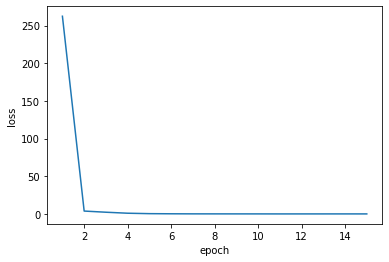

In [59]:
xs1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
ys1 = np.array([262.4840, 3.8455, 2.3058, 0.9787, 0.4058, 0.2301, 0.1398, 0.1166, 0.0976, 0.0845, 0.0570, 0.0638, 0.0707, 0.0747, 0.0641])

plt.plot(xs1, ys1)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Loss Function graph: For the second model trained on the training dataset provided in part 3.

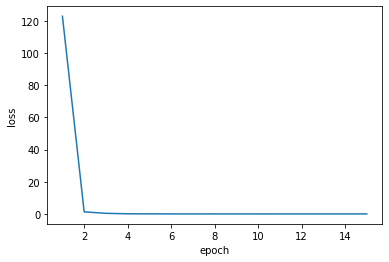

In [61]:
xs2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
ys2 = np.array([122.9115, 1.2815, 0.3666, 0.0841, 0.0280, 0.0047, 0.0029, 0.00056, 0.00032, 0.00017, 0.00010, 0.00008, 0.000055, 0.000067, 0.000047])

plt.plot(xs2, ys2)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

For the dataset provided in part 1, there were 62 types of characters including alphabets also, along with the digits and so the validation accuracy was very low because there must have been many cases where 'i' must have been considered '1' or '0'(zero) must have been considered 'o' and many such cases.

But, for the dataset provided in part 2, there were only digits and so the validation accuracy was much higher and also the convergence time was much quicker.

Reference:

For commands, <b style="color:green">tensorflow documentation</b> and <b style="color:green">stackoverflow</b>.